# Northwestern County Housing Renovation Analysis

Author: Armun Shakeri

# Overview

This project analyzes housing renovations and how renovations might increase the value of a property owners home. 

# Business Problem

Recently property values have been increasing throughout the United States. For those wanting to sell their homes, home renovations might be a way homeowners can increase their property value. This project analyzes these renovations and explores if they do have a positive increase on the house's value. 

# Data Understanding

The following data is imported from KC housing data and shows different information about homes such as the date a home was sold, price, bedrooms...etc. For this project we will only use some of the data available, others will be removed.

In [1]:
# Import standard packages 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3
from statsmodels.formula.api import ols
%matplotlib inline

In [2]:
# Run code to explore the data
kc = pd.read_csv('data/kc_house_data.csv')

In [3]:
# this shows information regarding variables in kc dataframe 
kc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [4]:
# Below we drop values that are irrelevant towards first time hombe buyer analysis 
kc = kc.drop(['date', 'view', 'sqft_above', 'sqft_basement', 'zipcode', 'lat', 'long', 'sqft_living15', 
        'sqft_lot15', 'waterfront'], axis=1)
kc.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,yr_built,yr_renovated
0,7129300520,221900.0,3,1.00,1180,5650,1.0,Average,7 Average,1955,0.0
1,6414100192,538000.0,3,2.25,2570,7242,2.0,Average,7 Average,1951,1991.0
2,5631500400,180000.0,2,1.00,770,10000,1.0,Average,6 Low Average,1933,NaN
3,2487200875,604000.0,4,3.00,1960,5000,1.0,Very Good,7 Average,1965,0.0
4,1954400510,510000.0,3,2.00,1680,8080,1.0,Average,8 Good,1987,0.0


In [5]:
# Here we drop all Na values. 
kc=kc.dropna()

In [6]:
# First time home buyers will not be looking at homes over $1,000,000. Homes above that threshold will be removed. 
# Homes with bedrooms at or above 4, and greater than 2 floors will also be removed. 
kc = kc[kc.price<=500000][kc.bedrooms<=4][kc.floors<=2]
kc.head()

<ipython-input-6-6b05abc0fdfb>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  kc = kc[kc.price<=500000][kc.bedrooms<=4][kc.floors<=2]
<ipython-input-6-6b05abc0fdfb>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  kc = kc[kc.price<=500000][kc.bedrooms<=4][kc.floors<=2]


,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,yr_built,yr_renovated
0,7129300520,221900.0,3,1.00,1180,5650,1.0,Average,7 Average,1955,0.0
6,1321400060,257500.0,3,2.25,1715,6819,2.0,Average,7 Average,1995,0.0
7,2008000270,291850.0,3,1.50,1060,9711,1.0,Average,7 Average,1963,0.0
8,2414600126,229500.0,3,1.00,1780,7470,1.0,Average,7 Average,1960,0.0
9,3793500160,323000.0,3,2.50,1890,6560,2.0,Average,7 Average,2003,0.0


In [7]:
kc.yr_renovated=kc.yr_renovated.astype(int)

In [16]:
kc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9458 entries, 0 to 21596
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            9458 non-null   int64  
 1   price         9458 non-null   float64
 2   bedrooms      9458 non-null   int64  
 3   bathrooms     9458 non-null   float64
 4   sqft_living   9458 non-null   int64  
 5   sqft_lot      9458 non-null   int64  
 6   floors        9458 non-null   float64
 7   condition     9458 non-null   object 
 8   grade         9458 non-null   object 
 9   yr_built      9458 non-null   int64  
 10  yr_renovated  9458 non-null   int64  
dtypes: float64(3), int64(6), object(2)
memory usage: 886.7+ KB


In [8]:
kc.sort_values('yr_renovated', ascending=False).head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,yr_built,yr_renovated
18560,8935100100,476000.0,4,3.00,2890,6885,1.0,Average,7 Average,1945,2015
16669,5113000420,420000.0,4,2.75,2400,20000,1.0,Average,8 Good,1961,2015
7090,9141100005,285000.0,4,3.50,2770,10505,2.0,Average,8 Good,1940,2015
7410,8665900328,459000.0,4,3.00,1900,9077,2.0,Average,7 Average,1954,2015
5678,2202500255,335000.0,3,2.00,1210,9926,1.0,Good,7 Average,1954,2015


# Data Modeling

In [9]:
# Here shows the different statistical values of the kc dataframe
kc.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,yr_built,yr_renovated
count,9.458000e+03,9458.000000,9458.000000,9458.000000,9458.000000,9.458000e+03,9458.000000,9458.000000,9458.000000
mean,4.558188e+09,337073.249418,3.057412,1.812566,1636.479594,1.244768e+04,1.340188,1969.448086,54.544513
std,2.829816e+09,92277.822878,0.702555,0.631639,556.609603,3.056596e+04,0.454926,26.999953,325.097119
min,1.200021e+06,80000.000000,1.000000,0.500000,370.000000,5.720000e+02,1.000000,1900.000000,0.000000
25%,2.159900e+09,265000.000000,3.000000,1.000000,1220.000000,5.241000e+03,1.000000,1952.000000,0.000000
50%,3.876805e+09,335000.000000,3.000000,1.750000,1580.000000,7.560000e+03,1.000000,1969.000000,0.000000
75%,7.296450e+09,415000.000000,4.000000,2.500000,1980.000000,9.812000e+03,2.000000,1991.000000,0.000000
max,9.895000e+09,500000.000000,4.000000,4.500000,4480.000000,1.164794e+06,2.000000,2015.000000,2015.000000


In [10]:
#fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(16,3))

#for xcol, ax in zip(['bedrooms', 'bathrooms', 'floors', 'yr_built'], axes):
#    kc.plot(kind='scatter', x=xcol, y='price', ax=ax, alpha=0.4, color='b')

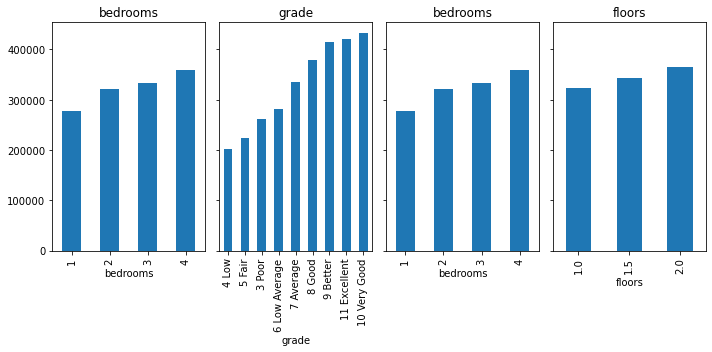

In [11]:
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(10,5), sharey=True)

categoricals = ['bedrooms', 'grade', 'bedrooms', 'floors']

for col, ax in zip(categoricals, axes.flatten()):
    (kc.groupby(col)            # group values together by column of interest
        .mean()['price']        # take the mean of the price for each group   
        .sort_values()          # sort the groups in ascending order
        .plot                   
        .bar(ax=ax))            # create a bar graph on the ax
    
    ax.set_title(col)           # make the title the name of the column

fig.tight_layout()

In [22]:
# trying to see if home renovations increases the value of the home. 
# plotting only renovated homes
# colors differentiate grade of home
# use line of best fit?


fig, ax = plt.subplots()

colors = {'4 Low':'red', '5 Fair':'blue', '3 Poor':'yellow', '6 Low Average':'orange', '7 Average':'purple', 
          '8 Good':'green', '9 Better':'brown', '10 Very Good':'black', '11 Excellent':'maroon'}

grouped = kc.groupby('grade')
for key, group in grouped:
    if yr_renovated = 0:
        group.plot(ax=ax, kind='scatter', x='yr_renovated', y='price', label=key, color=colors[key])
    else:
        
plt.show()

SyntaxError: invalid syntax (<ipython-input-22-67dcb7ba5f03>, line 14)